In [24]:
######################################
######################################
#PRE_PROCESSING_CLEANING_MANIPULATION#
######################################



In [1]:
####
#Call modules
import pandas as pd
import datetime as dt
import numpy as np   
import math as mt

In [2]:
# Read in data frames

#Info on sex strain DOB and ids of each animal
Census = pd.read_csv("SamCensus.csv", encoding = "ISO-8859-1")

# convert dates
Census['dob'] = pd.to_datetime(Census['dob'])
Census

,cohort,Animal ID,tag,sex,strain,dob,idno,cage,eartag,name
0,1,590340,SLAM001,F,HET3,2015-09-29,1.0,1,NaN,Khilee
1,1,590341,SLAM002,F,HET3,2015-09-29,2.0,1,NaN,Aynsley
2,1,590342,FF9100,F,HET3,2015-09-29,3.0,1,R,Alessia
3,1,590343,FF9101,F,HET3,2015-09-29,4.0,1,L,Arabia
4,1,590358,SLAM026,M,HET3,2015-09-22,50.0,2,NaN,Kayvion
5,1,590359,SLAM027,M,HET3,2015-09-22,51.0,2,NaN,Wilberth
6,1,590361,AA8101,M,HET3,2015-09-22,53.0,2,L,Davide
7,1,590155,SLAM051,F,B6,2015-09-22,97.0,3,NaN,Bitania
8,1,590156,SLAM052,F,B6,2015-09-22,98.0,3,NaN,Orquidea
9,1,590157,UV5550,F,B6,2015-09-22,99.0,3,R,Evian


In [3]:

#Death information on each animal
Surv = pd.read_csv("Survival Slam.csv", encoding = "ISO-8859-1")

Surv = Surv.convert_objects() 
## Filter for animals who were killed on accident / to harvest organs
Surv = Surv[Surv.cod != "End of study, organs removed"]
Surv = Surv[Surv.cod != "Used in experiment"]
Surv = Surv[Surv.cod != "Cage flood"]

##Remove animals that haven't died
#Surv = Surv[pd.notnull(Surv.tod)] ### LIFESPAN ONLY COMMENT OUT FOR AGE
Surv["tod"] = pd.to_datetime(Surv["tod"])

Surv

C:\Users\gusso\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


,tag,tod,cod
0,179927,2018-08-24,Per PI
3,KL0487,2017-03-29,DVR or Pathology
6,KL1788,2018-07-18,Died during procedure
7,KL0489,2018-07-06,Culled Per Vet
12,SLAM098,2018-06-07,Found dead
13,SLAM099,2017-12-02,Found dead
14,KL1792,2018-04-09,Culled
15,KL1793,2018-06-14,Culled Per Vet
17,KL1794,2017-07-16,Per PI
19,UV5542,2017-11-01,DVR or Pathology


In [4]:

#Blood hematology data
blood = pd.read_csv("SLAMadvia2018_12_3.csv", 
                    encoding = "ISO-8859-1")
### Convert dates
blood['Date.Time'] = pd.to_datetime(blood['Date.Time'])
blood = blood.convert_objects(convert_numeric=True)

###Merge with census
blood = blood.merge(Census, how = 'inner', left_on = 'Identifier', right_on = 'idno')

##Merge with Surv
blood = blood.merge(Surv, how = 'right', on = 'tag')

###Make new columns for age at measurement and lifespan
blood['age'] = (blood['Date.Time'] - blood['dob'])

blood['lifespan'] = blood['tod'] - blood['dob']


###clean erroneous measurements, obvious because the age of the animal is longer than how long they actually lived
blood = blood[blood.age < blood.lifespan]

###filter for measurements where the animal is less than 12 months old LIFESPAN ONLY 
#blood = blood[blood.age < dt.timedelta(days =(12*365))]

## Sort by ascending age FOR LIFESPAN
#blood.sort_values(by = 'age')

####Earliest measurement for each animal FOR LIFESPAN
#blood = blood.drop_duplicates(subset = 'Identifier')
#blood.head

##### time delta for lifespan to numeric
blood['lifespan'] = (blood.lifespan / np.timedelta64(1, 'D')).astype(int)
blood['age'] = (blood.age / np.timedelta64(1, 'D')).astype(int)


C:\Users\gusso\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys


In [5]:
####### MACHINE LEARNING APPLIED TO DATASET####
##############################################
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import Imputer

In [18]:
##### PIPELINE FOR LIFESPAN RUN THIS BLOCK FOR LIFESPAN
df1 = blood

##Filter for sex and strain
df1 = df1[df1.sex == 'M']  ###ADJUST FOR W/E Sex strain u want
df1 = df1[df1.strain == 'HET3']
###select valuable columns
features = df1.loc[:,'WBCP.x10E03.cells.µL.':'reticCHCM.g.dL.']



###Impute missing values
imp = Imputer(missing_values= 'NaN', strategy = 'mean', axis = 0)
features = pd.DataFrame(imp.fit_transform(features))

###Set target value (lifespan or age)
#targets = df1.lifespan
targets = df1.age
df1.head()

,Identifier,InstNo,Specimen,SampSel,SamplerTyp,SamplType,Sequence,Date.Time,SpecCode,RackNo,...,strain,dob,idno,cage,eartag,name,tod,cod,age,lifespan
27,282.0,IR43971634,0.0,1.0,0.0,0.0,44.0,2018-03-22,800.0,0.0,...,HET3,2015-12-22,282.0,87,R,Brixten,2018-06-22,Died during procedure,821,913
28,282.0,IR43971634,0.0,2.0,0.0,0.0,205.0,2017-12-21,800.0,0.0,...,HET3,2015-12-22,282.0,87,R,Brixten,2018-06-22,Died during procedure,730,913
29,282.0,IR43971634,0.0,2.0,0.0,0.0,598.0,2017-09-13,800.0,0.0,...,HET3,2015-12-22,282.0,87,R,Brixten,2018-06-22,Died during procedure,631,913
30,282.0,IR43971634,0.0,2.0,0.0,0.0,193.0,2017-06-14,800.0,0.0,...,HET3,2015-12-22,282.0,87,R,Brixten,2018-06-22,Died during procedure,540,913
31,282.0,IR43971634,0.0,2.0,0.0,0.0,105.0,2017-03-17,800.0,0.0,...,HET3,2015-12-22,282.0,87,R,Brixten,2018-06-22,Died during procedure,451,913


In [12]:
###Make 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8)

scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

C:\Users\gusso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [22]:
###Train model
from sklearn.ensemble import RandomForestRegressor

#rf = RandomForestRegressor(n_estimators=500, oob_score=True)
#rf.fit(X_train, y_train)
y_test.unique()

array([ 451,  730,  630,  276,  274,  539, 1004,  563,  821,  556,  612,
        464,  189,  541,  639,  190,  365,  723,  822,  185,  553,  640,
        272,  647,  443,  455,  913,  646,  275,  548,  643,  729,   91,
        371,  457,  471,  549,  555,  458,  528,  631,  374,  465,  540,
        273,  368,  532,   94,  182,  184,  366,  359,  358,  183,  449,
        364,  731,   82,  562,  280,  367,  441,  909,   93,  545,  546,
        728,  361,  560,   85,  437,  645,  717,  644,  534,  637,  653], dtype=int64)

Out-of-bag R-2 score estimate: 0.715
Test data R-2 score: 0.715
Test data Spearman correlation: 0.839
Test data Pearson correlation: 0.847


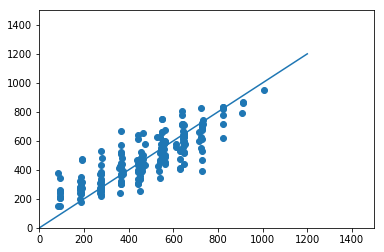

In [14]:
%matplotlib inline
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
x1, y1 = [0, 1200], [0, 1200]
x2, y2 = [1, 10], [3, 2]

predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)

test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')
X_test1  = X_test[0].astype(str) + X_test[1].astype(str) 
plt.ylim(0, 1500)
plt.xlim(0, 1500)
plt.scatter(y_test,predicted_test)
# plt.scatter(y_train,predicted_train)
plt.plot(x1, y1)

In [29]:
len(y_test.unique())

77

In [36]:
len(set([round(x) for x in predicted_test]))

173